In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import chi2
plt.rcParams["font.family"]="BM YEONSUNG"
D=pd.read_excel("../더했다간미워할거야.xlsx")
save_data=pd.DataFrame(D)
cols1=[x for x in D.columns if x.find("만족도")!=-1]
cols2=["삶의 사다리 점수","성별","연령","교육수준","종교"]
data=pd.DataFrame(D[cols1+cols2])
total_test_data=data[data.columns.difference((["연령","삶의 사다리 점수"]))]

# 데이터 불러오기
> 가장 큰 카테고리 위주

In [2]:
data.columns

Index(['가족생활에 대한 만족도', '(가)건강 만족도', '(나)가족의 수입 만족도', '(다)주거 환경 만족도',
       '(라)가족관계 만족도', '(마)직업 만족도', '(바)사회적 친분관계 만족도', '(사)여가생활 만족도',
       '삶의 사다리 점수', '성별', '연령', '교육수준', '종교'],
      dtype='object')

# 독립성 검정을 위한 조건 만족하는 컬럼들 구하기

In [3]:
result=chi2.chi2_try(total_test_data)

## 조건성립

In [4]:
ps=[x["Pairs"] for x in result["Pass"]]

## 조건 미성립
### type1(관측수<30)

In [6]:
t1=[x["Pairs"] for x in result["type1"]]

### type2(자유도=1,모든 기대도수가 5를 넘기지 못함)

In [7]:
t2=[x["Pairs"] for x in result["type2"]]

### type3(자유도>1,5를 넘긴 기대도수의 개수가 전체 관측가능한 기대도수 개수의 20%를 넘김)

In [8]:
t3=[x["Pairs"] for x in result["type3"]]

### type4(자유도>1,5를 넘긴 기대도수의 개수적으나 모든 기대도수가 1을 넘기진 않음)

In [9]:
t4=[x["Pairs"] for x in result["type4"]]

# 독립성 검정 기본조건을 만족하지 못하는 컬럼

## 각 에러들의 발생 수
>자유도가 1이상인 상황에서 기대도수 문제들이 발생함(type3,type4)

In [10]:
for x in [t1,t2,t3,t4]:
    print(f"{len(x)}",end="\t")

0	0	20	0	

## 가장 많은 문제를 가진 컬럼 알아보기
> 교육수준과 사회적 친분관계 만족도가 독립성 검정을 하기 가장 어려운 column

In [11]:
total=sum(sum([t1,t2,t3,t4],[]),[])
count_col=dict.fromkeys(total)
for col in set(total):
    count_col[col]=total.count(col)
x=pd.DataFrame(data=count_col,index=range(len(count_col))).T[[0]]
x.rename(columns={0:'count'},inplace=True)

In [12]:
x

,count
(나)가족의 수입 만족도,1
(바)사회적 친분관계 만족도,7
(다)주거 환경 만족도,4
(마)직업 만족도,6
가족생활에 대한 만족도,6
교육수준,6
(라)가족관계 만족도,5
(사)여가생활 만족도,5


## 문제되는 column의 분포 시각화

### 교육
> 7:대학교, 8:대학원(석사), 9:대학원(박사) -> 수가 너무 적음
* 해결책 : 이들을 하나의 카테고리로 묶어줄 필요가 있음

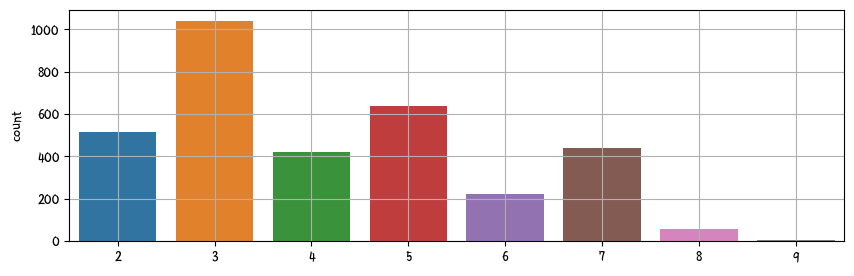

In [20]:
visual_ed=data[["교육수준"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.grid()
plt.show()

#### 대학교 이상의 학벌은 모두 하나의 카테고리로 분류
> 따라서 대학교, 대학원은 모두 7

In [21]:
data["교육수준"]=data["교육수준"].apply(lambda x:7 if x>=7 else x)
save_data["교육수준"]=save_data["교육수준"].apply(lambda x:7 if x>=7 else x)

#### 수정 후 시각화

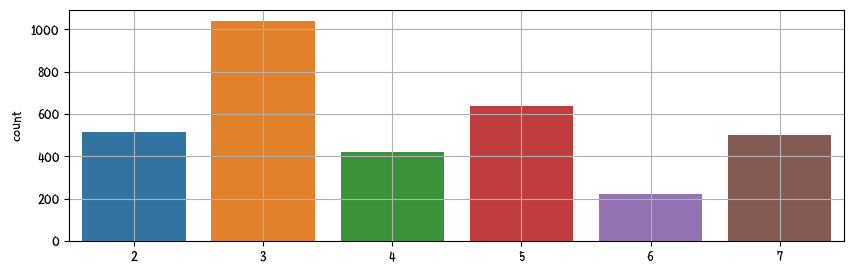

In [22]:
visual_ed=data[["교육수준"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.grid()
plt.show()

### (바)사회적 친분관계 만족도
> 1:매우 불만족 2:불만족, 5:매우 만족 -> 수가 너무 부족함
* 해결책 : 이들을 근방의 카테고리에 함께 묶어줄 필요가 있음

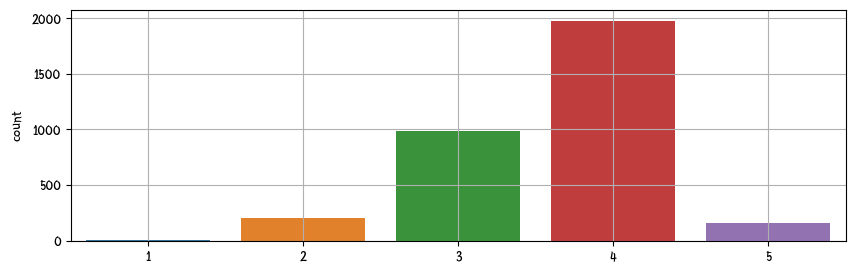

In [13]:
visual_so=data[["(바)사회적 친분관계 만족도"]].value_counts().to_frame().sort_index()
visual_so.index=list(map(lambda x:x[0],visual_so.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_so,x=visual_so.index,y=visual_so["count"])
plt.grid()
plt.show()

#### 아래와 같이 다시 분류
> 1,2의 답변을 한 사람은 모두 3         
> 5의 답변을 한 사람은 4

In [14]:
def soci(x):
    if x<=2:
        return 2
    # elif x>=5:
        # return 4
    else:
        return x
data["(바)사회적 친분관계 만족도"]=data["(바)사회적 친분관계 만족도"].apply(soci)
save_data["(바)사회적 친분관계 만족도"]=save_data["(바)사회적 친분관계 만족도"].apply(soci)

#### 수정 후 시각화

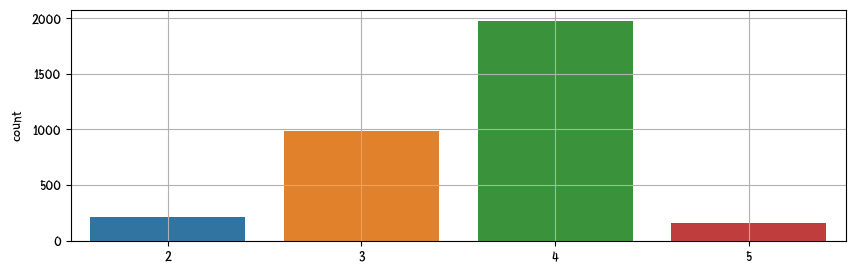

In [15]:
visual_so=data[["(바)사회적 친분관계 만족도"]].value_counts().to_frame().sort_index()
visual_so.index=list(map(lambda x:x[0],visual_so.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_so,x=visual_so.index,y=visual_so["count"])
plt.grid()
plt.show()

## 독립성 검정 가능 여부 재확인

In [23]:
total_test_data2=data[data.columns.difference((["연령","삶의 사다리 점수"]))]
result2=chi2.chi2_try(total_test_data2)

### 에러 발생 수

In [24]:
temp=[]
for x in ["type1","type2","type3","type4"]:
    temp.append([x['Pairs'] for x in result2[x]])
    print(len([x['Pairs'] for x in result2[x]]),end="\t")

0	0	8	0	

In [25]:
total2=sum(sum(temp,[]),[])
count_col2=dict.fromkeys(total2)
for col in set(total2):
    count_col2[col]=total2.count(col)
x2=pd.DataFrame(data=count_col2,index=range(len(count_col2))).T[[0]]
x2.rename(columns={0:'count'},inplace=True)

In [26]:
x2

,count
(다)주거 환경 만족도,2
(마)직업 만족도,4
가족생활에 대한 만족도,4
(라)가족관계 만족도,3
(사)여가생활 만족도,3


> 위에서 처리한 두가지 column은 문제를 발생시키지 않음          
> 다음 column을 설정해야함          
> 가족생활에 대한 만족도 Vs 가족관계 만족도를 주시해보자

## 문제가 되는 column 처리2
> 가족생활에 대한 만족도 VS 가족관계 만족도 에 대한 처리

### 시각화

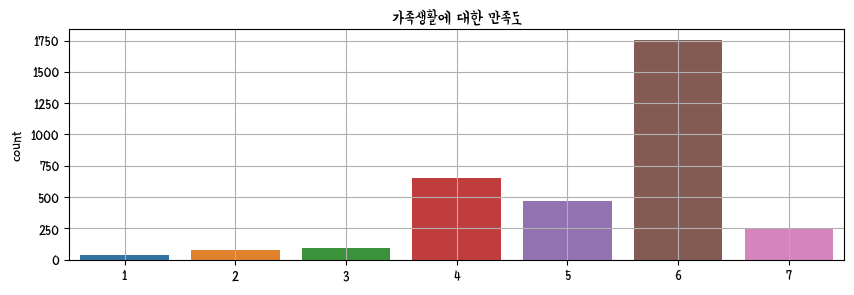

In [27]:
visual_fam=data[['가족생활에 대한 만족도']].value_counts().to_frame().sort_index()
visual_fam.index=list(map(lambda x:x[0],visual_fam.index))
plt.figure(figsize=(10,3),label="가족생활에 대한 만족도")
sb.barplot(data=visual_fam,x=visual_fam.index,y=visual_fam["count"])
plt.title("가족생활에 대한 만족도")
plt.grid()
plt.show()

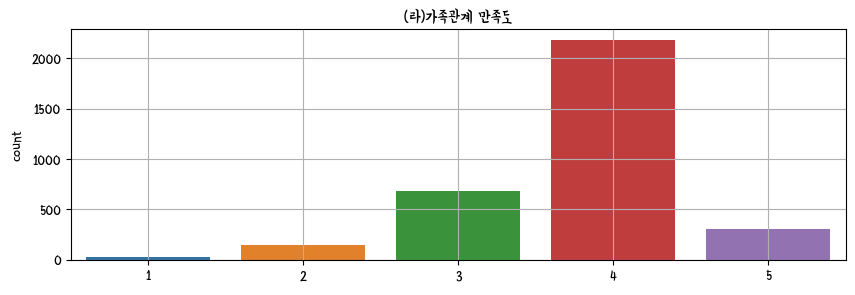

In [28]:
visual_fam2=data[['(라)가족관계 만족도']].value_counts().to_frame().sort_index()
visual_fam2.index=list(map(lambda x:x[0],visual_fam2.index))
plt.figure(figsize=(10,3),label="(라)가족관계 만족도")
sb.barplot(data=visual_fam2,x=visual_fam2.index,y=visual_fam2["count"])
plt.title("(라)가족관계 만족도")
plt.grid()
plt.show()

### 둘 사이의 기대도수 확인하기

In [29]:
[x for x in result["type3"]][8]["DataFrame"].style.background_gradient(cmap='PuBu')

가족생활에 대한 만족도,1,2,3,4,5,6,7
(라)가족관계 만족도,,,,,,,
1,0.241452,0.551890,0.662268,4.477205,3.242352,12.113977,1.710858
2,1.522196,3.479304,4.175165,28.225855,20.440912,76.370726,10.785843
3,7.117576,16.268746,19.522496,131.980204,95.578884,357.098980,50.433113
4,22.916917,52.381524,62.857828,424.945111,307.741452,1149.774445,162.382723
5,3.201860,7.318536,8.782244,59.371626,42.996401,160.641872,22.687463


### 상관계수 확인하기
> 해당 column이 얼마나 종속변수와 상관관계를 가지는지 확인하자          
> 두개의 column 사이의 상관관계도 확인하자

#### 종속변수와의 상관관계

In [30]:
data[["삶의 사다리 점수",'가족생활에 대한 만족도','(라)가족관계 만족도']].corr(method="spearman")

,삶의 사다리 점수,가족생활에 대한 만족도,(라)가족관계 만족도
삶의 사다리 점수,1.000000,0.437341,0.393413
가족생활에 대한 만족도,0.437341,1.000000,0.622428
(라)가족관계 만족도,0.393413,0.622428,1.000000


In [31]:
import scipy.stats as sps

In [32]:
#p value 를 확인해도 0.05보다 낮으니 둘 사이의 강한 상관관계가 있음
sps.spearmanr(data[['가족생활에 대한 만족도','(라)가족관계 만족도']])

SignificanceResult(statistic=0.6224284614638246, pvalue=0.0)

### 가장 간단히 범주 확장
> 가족관계 만족도에서 1을 대답한 사람           
> 이를 만족도 2에 대답한 사람과 통합

In [33]:
data['(라)가족관계 만족도']=data['(라)가족관계 만족도'].apply(lambda x:x if x>=2 else 2)
save_data['(라)가족관계 만족도']=save_data['(라)가족관계 만족도'].apply(lambda x:x if x>=2 else 2)

### 통합 후 시각화

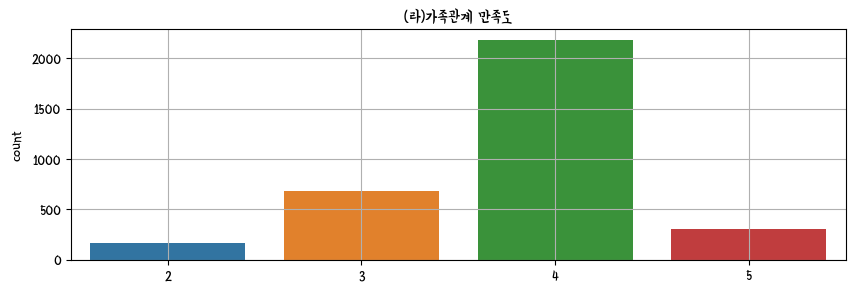

In [34]:
visual_fam2=data[['(라)가족관계 만족도']].value_counts().to_frame().sort_index()
visual_fam2.index=list(map(lambda x:x[0],visual_fam2.index))
plt.figure(figsize=(10,3),label="(라)가족관계 만족도")
sb.barplot(data=visual_fam2,x=visual_fam2.index,y=visual_fam2["count"])
plt.title("(라)가족관계 만족도")
plt.grid()
plt.show()

### 변경 후의 상관계수 및 p-value
> 변화없음

In [35]:
data[["삶의 사다리 점수",'가족생활에 대한 만족도','(라)가족관계 만족도']].corr(method="spearman")

,삶의 사다리 점수,가족생활에 대한 만족도,(라)가족관계 만족도
삶의 사다리 점수,1.000000,0.437341,0.393069
가족생활에 대한 만족도,0.437341,1.000000,0.622267
(라)가족관계 만족도,0.393069,0.622267,1.000000


### 변경 후의 독립성 검정 가능여부 확인
### 가족생활에 대한 만족도 -> 삭제
> 이미 가족관계만족도와 높은 상관관계를 보였으므로

In [36]:
data.drop("가족생활에 대한 만족도",axis=1,inplace=True)
save_data.drop("가족생활에 대한 만족도",axis=1,inplace=True)

In [37]:
total_test_data3=data[data.columns.difference((["연령","삶의 사다리 점수"]))]
result3=chi2.chi2_try(total_test_data3)

#### 확연히 error의 수가 줄어들었음

In [38]:
temp=[]
for x in ["type1","type2","type3","type4"]:
    temp.append([x['Pairs'] for x in result3[x]])
    print(len([x['Pairs'] for x in result3[x]]),end="\t")

0	0	2	0	

In [39]:
total3=sum(sum(temp,[]),[])
count_col3=dict.fromkeys(total3)
for col in set(total3):
    count_col3[col]=total3.count(col)
x3=pd.DataFrame(data=count_col3,index=range(len(count_col3))).T[[0]]
x3.rename(columns={0:'count'},inplace=True)

In [40]:
x3

,count
(다)주거 환경 만족도,1
(마)직업 만족도,2
(사)여가생활 만족도,1


### 직업만족도와 여가생활 만족도 column 보기

#### 직업만족도
> 1,5에 해당하는 사람이 적음.

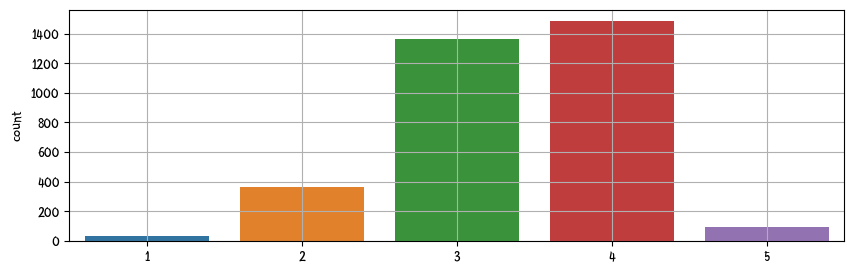

In [41]:
visual_ed=data[["(마)직업 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.grid()
plt.show()

#### 여가생활 만족도 또한 마찬가지

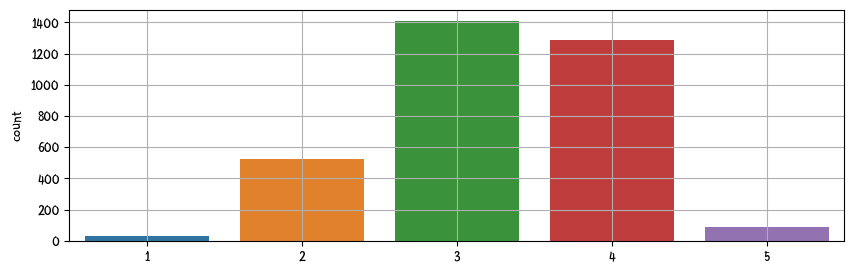

In [42]:
visual_ed=data[["(사)여가생활 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.grid()
plt.show()

### 위의 과정을 동일하게 반복하자

In [43]:
def scale_score(x):
    if x<=2:
        return 2
    elif x>=5:
        return 4
    else:
        return x
data["(마)직업 만족도"]=data["(마)직업 만족도"].apply(scale_score)
save_data["(마)직업 만족도"]=save_data["(마)직업 만족도"].apply(scale_score)
data["(사)여가생활 만족도"]=data["(사)여가생활 만족도"].apply(scale_score)
save_data["(사)여가생활 만족도"]=save_data["(사)여가생활 만족도"].apply(scale_score)

### 변경 후 각각의 시각화

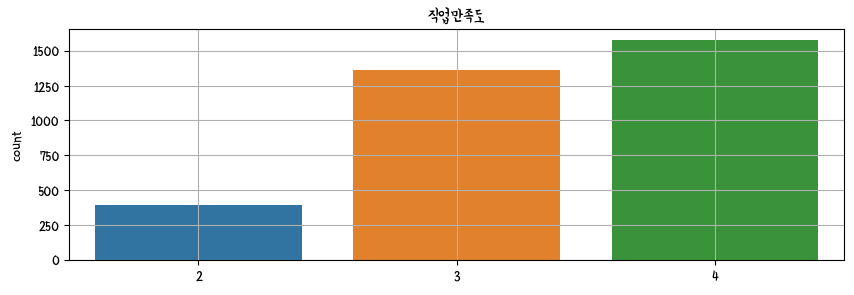

In [44]:
visual_ed=data[["(마)직업 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.title("직업만족도")
plt.grid()
plt.show()

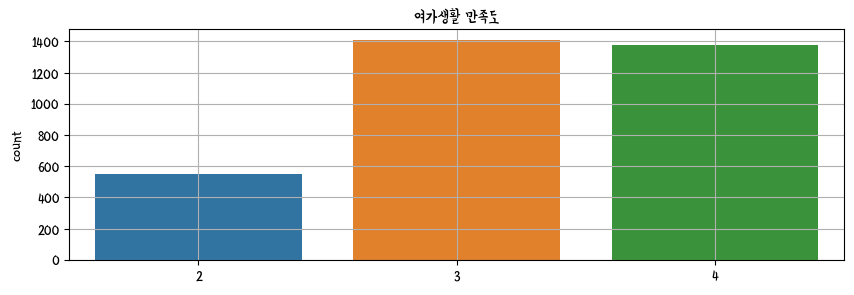

In [45]:
visual_ed=data[["(사)여가생활 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.title("여가생활 만족도")
plt.grid()
plt.show()

### 독립성 검정 가능여부 확인

In [46]:
total_test_data4=data[data.columns.difference((["연령","삶의 사다리 점수"]))]
result4=chi2.chi2_try(total_test_data4)

In [47]:
temp=[]
for x in ["type1","type2","type3","type4"]:
    temp.append([x['Pairs'] for x in result4[x]])
    print(len([x['Pairs'] for x in result4[x]]),end="\t")

0	0	0	0	

In [48]:
total4=sum(sum(temp,[]),[])
count_col4=dict.fromkeys(total4)
for col in set(total4):
    count_col4[col]=total4.count(col)
x4=pd.DataFrame(data=count_col4,index=range(len(count_col4))).T[[0]]
x4.rename(columns={0:'count'},inplace=True)

KeyError: "None of [Index([0], dtype='int32')] are in the [columns]"

In [ ]:
x4

,count
(나)가족의 수입 만족도,1
(다)주거 환경 만족도,1


### 가족의 수입 만족도와 주거 환경 만족도 column

#### 각각의 시각화

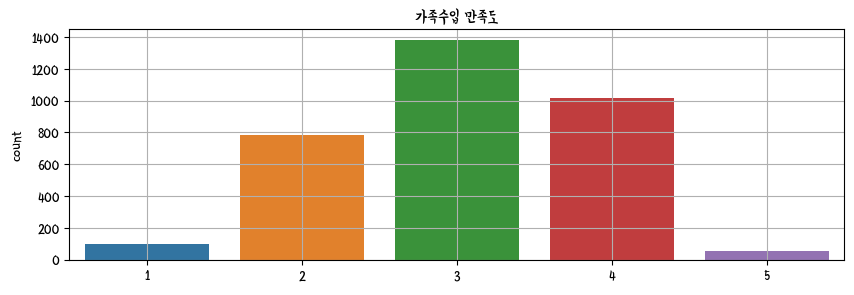

In [216]:
visual_ed=data[["(나)가족의 수입 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.title("가족수입 만족도")
plt.grid()
plt.show()

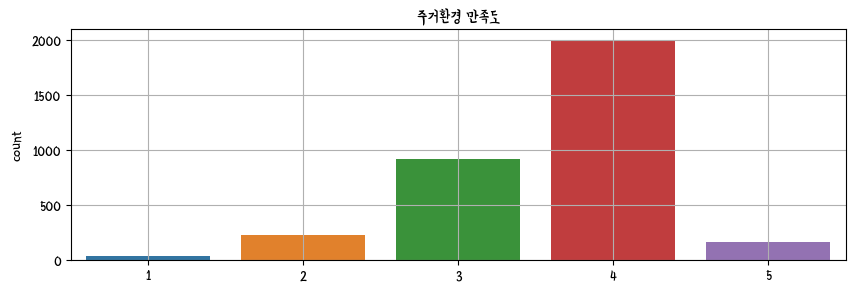

In [217]:
visual_ed=data[["(다)주거 환경 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.title("주거환경 만족도")
plt.grid()
plt.show()

#### 기대도수 확인하기

In [218]:
result4["type4"][0]["DataFrame"]

(다)주거 환경 만족도,1,2,3,4,5
(나)가족의 수입 만족도,,,,,
1,1.009598,6.799940,27.140372,59.358428,4.691662
2,7.985003,53.781344,214.655669,469.471206,37.106779
3,14.093581,94.924415,378.868626,828.619676,65.493701
4,10.381524,69.922615,279.079784,610.372525,48.243551
5,0.530294,3.571686,14.255549,31.178164,2.464307


### 주거환경 만족도
> 1,5의 값이 부족함

In [49]:
def scale_score(x):
    if x<=2:
        return 2
    elif x>=5:
        return 4
    else:
        return x
data["(다)주거 환경 만족도"]=data["(다)주거 환경 만족도"].apply(scale_score)
save_data["(다)주거 환경 만족도"]=save_data["(다)주거 환경 만족도"].apply(scale_score)

### 변경 후 시각화

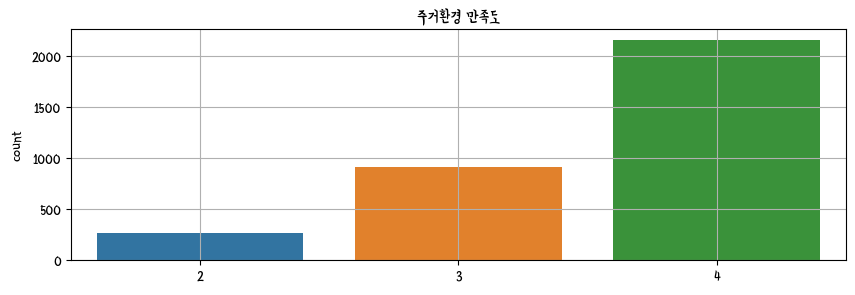

In [220]:
visual_ed=data[["(다)주거 환경 만족도"]].value_counts().to_frame().sort_index()
visual_ed.index=list(map(lambda x:x[0],visual_ed.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual_ed,x=visual_ed.index,y=visual_ed["count"])
plt.title("주거환경 만족도")
plt.grid()
plt.show()

### 독립성 검정여부 확인

In [50]:
total_test_data5=data[data.columns.difference((["연령","삶의 사다리 점수"]))]
result5=chi2.chi2_try(total_test_data5)

In [51]:
temp=[]
for x in ["type1","type2","type3","type4"]:
    temp.append([x['Pairs'] for x in result5[x]])
    print(len([x['Pairs'] for x in result5[x]]),end="\t")

0	0	0	0	

### 이로써 독립성 검정(카이제곱 검정)의 조건을 모두 만족

## 독립성 검정(p-value 확인)

In [52]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result5["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.1

In [53]:
Indep[Indep["독립성"]==True]

,검정대상,pvalue,독립성
21,"[(다)주거 환경 만족도, 교육수준]",0.402592,True
23,"[(다)주거 환경 만족도, 종교]",0.423322,True


In [232]:
Indep

,검정대상,pvalue,독립성
0,"[(가)건강 만족도, (나)가족의 수입 만족도]",1.932109e-139,False
1,"[(가)건강 만족도, (다)주거 환경 만족도]",3.637324e-20,False
2,"[(가)건강 만족도, (라)가족관계 만족도]",1.740178e-64,False
3,"[(가)건강 만족도, (마)직업 만족도]",2.692873e-89,False
4,"[(가)건강 만족도, (바)사회적 친분관계 만족도]",6.398657e-90,False
5,"[(가)건강 만족도, (사)여가생활 만족도]",9.238996e-87,False
6,"[(가)건강 만족도, 교육수준]",2.487007e-96,False
7,"[(가)건강 만족도, 성별]",5.348046e-57,False
8,"[(가)건강 만족도, 종교]",7.459737e-33,False
9,"[(나)가족의 수입 만족도, (다)주거 환경 만족도]",2.439185e-104,False


In [226]:
save_data.to_excel("./대표값위주스케일링.xlsx")